In [4]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-05-21 05:54:16--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.26, 104.192.142.25, 104.192.142.24, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-05-21 05:54:24 (16.4 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [5]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
tf.__version__

'2.18.0'

In [8]:
img_height, img_width = 32,32
batch_size = 20
trains_ds = tf.keras.utils.image_dataset_from_directory('fruits/train',image_size=(img_height,img_width),batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory('fruits/validation',image_size=(img_height,img_width),batch_size=batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory('fruits/test',image_size=(img_height,img_width),batch_size=batch_size)


Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


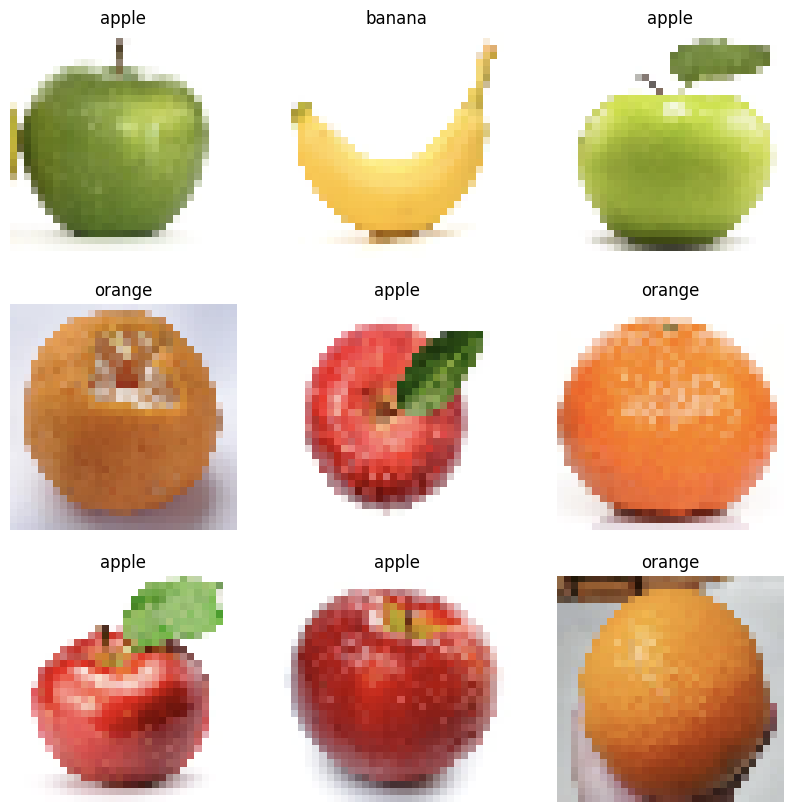

In [9]:
class_names = ['apple','banana','orange']
plt.figure(figsize=(10,10))
for images ,labels in trains_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')



In [10]:
model = tf.keras.Sequential(
    [tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32,3,activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64,3,activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(128,3,activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128,activation='relu'),
     tf.keras.layers.Dense(3)
     ]
)

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [12]:
model.fit(trains_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.4033 - loss: 1.0382 - val_accuracy: 0.6364 - val_loss: 0.6681
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7615 - loss: 0.5671 - val_accuracy: 0.8939 - val_loss: 0.3305
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8832 - loss: 0.2948 - val_accuracy: 0.9394 - val_loss: 0.1906
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9103 - loss: 0.2313 - val_accuracy: 0.9545 - val_loss: 0.1233
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9460 - loss: 0.1490 - val_accuracy: 0.9242 - val_loss: 0.1180
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.9527 - loss: 0.1329 - val_accuracy: 0.8636 - val_loss: 0.5259
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9627 - loss: 0.1262 - val_accuracy: 0.9545 - val_loss: 0.1079
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9888 - loss: 0.0494 - val_accuracy: 0.9091 -

In [13]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9785 - loss: 0.1284


[0.125417560338974, 0.9769230484962463]

tf.Tensor(
[[ -2.458914    -3.5889466    2.484136  ]
 [ -3.4925652   -7.069433     5.052852  ]
 [ -3.1108792   -7.42366      4.953828  ]
 [  2.7006366   -1.6302311   -2.5922139 ]
 [  3.172924    -2.029567    -2.707814  ]
 [ -3.7843099    5.8177295   -6.4815764 ]
 [ -0.11044465  -0.3630404   -1.9462559 ]
 [  6.1919813   -6.76707     -1.0757251 ]
 [  9.275765   -11.08146     -0.5475964 ]
 [ -2.739559    -0.18796274  -0.84362036]
 [ -3.1073973    5.352542    -6.4540124 ]
 [ -3.4150474    5.5172496   -6.515572  ]
 [  6.0595016   -7.7498326   -0.7794512 ]
 [  8.5988245   -9.277861    -0.9931545 ]
 [  2.069825    -3.3132432   -0.9771197 ]
 [  2.0903594   -0.911142    -2.8061056 ]
 [ -2.3607075    3.6337574   -4.6842275 ]
 [  1.6527818   -2.4290469   -1.3241186 ]
 [ -3.3117294    4.739604    -5.4039807 ]
 [  4.3920155   -3.7463639   -2.4564946 ]], shape=(20, 3), dtype=float32)


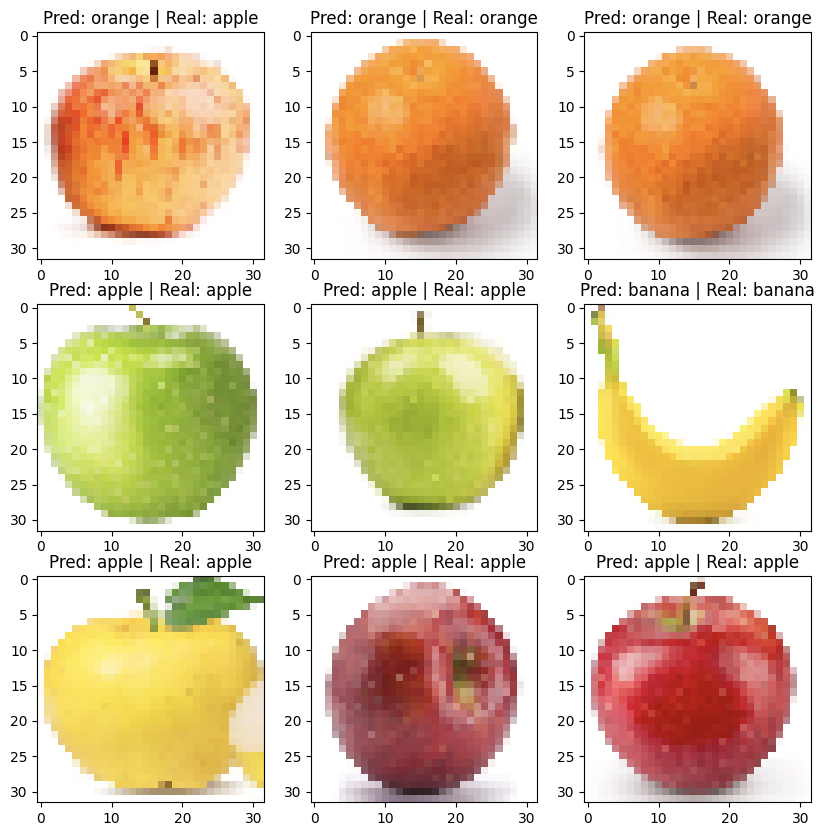

In [23]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])